In [1]:
# Importing essential libraries
import pandas as pd
import numpy as np

In [2]:
# load & Display the first few rows
titanic_data = pd.read_csv('titanic.csv')
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [3]:
# Displaying basic information 
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [4]:
# Displaying statistical summary
titanic_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [5]:
# Checking for missing data in each column
titanic_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [6]:
# Fill missing Age values 
titanic_data['Age'].fillna(titanic_data['Age'].median(), inplace=True)

C:\Users\ghosh\AppData\Local\Temp\ipykernel_20388\3515549757.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic_data['Age'].fillna(titanic_data['Age'].median(), inplace=True)


In [7]:
# Fill missing Embarked values with the most common value
titanic_data['Embarked'].fillna(titanic_data['Embarked'].mode()[0], inplace=True)

C:\Users\ghosh\AppData\Local\Temp\ipykernel_20388\1491056039.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic_data['Embarked'].fillna(titanic_data['Embarked'].mode()[0], inplace=True)


In [8]:
# Drop rows with missing 'Fare' values 
titanic_data.dropna(subset=['Fare'], inplace=True)

In [9]:
# Drop columns that aren't useful (like PassengerId, Name, etc.)
titanic_data.drop(columns=['PassengerId', 'Ticket', 'Cabin'], inplace=True)

In [10]:
#Step 5: Analyze Passenger Data
# Group data by gender and calculate survival rate
# survival_rate_by_gender = titanic_data.groupby('Sex')['Survived'].mean() * 100
# survival_rate_by_gender


## Data Cleaning Explanation
In this step, we handle missing values for the Age, Cabin, and Embarked columns. 
- **Age**: Imputed using the median age, which is a robust choice for missing numerical values.
- **Cabin**: This column has a large number of missing values, so it will be dropped.
- **Embarked**: Missing values will be filled with the mode, as it is the most frequent value.


In [11]:
print(len(titanic_data))

417


In [12]:
c=0
t=0
for i in range(len(titanic_data)):
    if titanic_data['Sex'].iloc[i]=='male':
       c+=1
    else:
        t+=1

In [13]:
#Total male & female
print("Total no of male is:",c)
print("Total no of female is:",t)

Total no of male is: 265
Total no of female is: 152


In [14]:
c1=(c*100)/(c+t)
t1=(t*100)/(c+t)

In [15]:
#percentage of male & female
print(f"Percentage of male is:{c1:.2f}%")
print(f"Percentage of female is:{t1:.2f}%")

Percentage of male is:63.55%
Percentage of female is:36.45%


In [16]:
s1=0
s2=0

for i in range(c):
    if titanic_data['Survived'].iloc[i]==1:
        s1+=1
    else:
        s2+=1

In [17]:
#alive male
print("Total no of male who alived:",s1)
print("Total no of male who are dead:",s2)

Total no of male who alived: 100
Total no of male who are dead: 165


In [18]:
s11=(s1*100)/(s1+s2)
s22=(s2*100)/(s1+s2)


## Additional Visualizations
Visualizing the distribution of fares and ages using box plots to detect outliers.


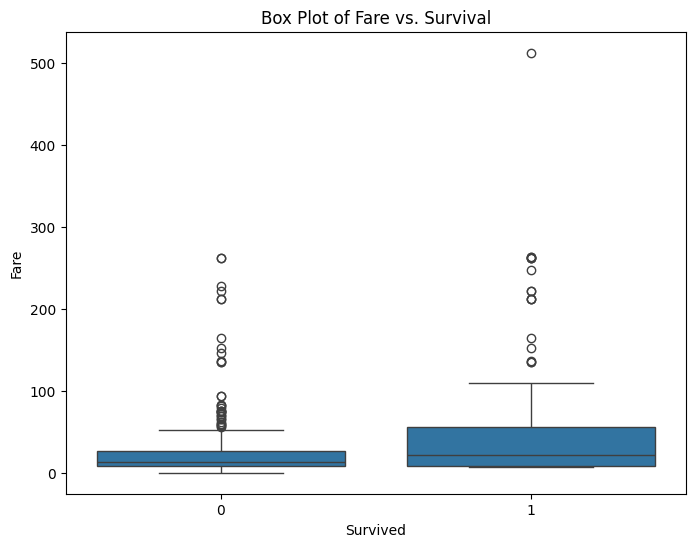

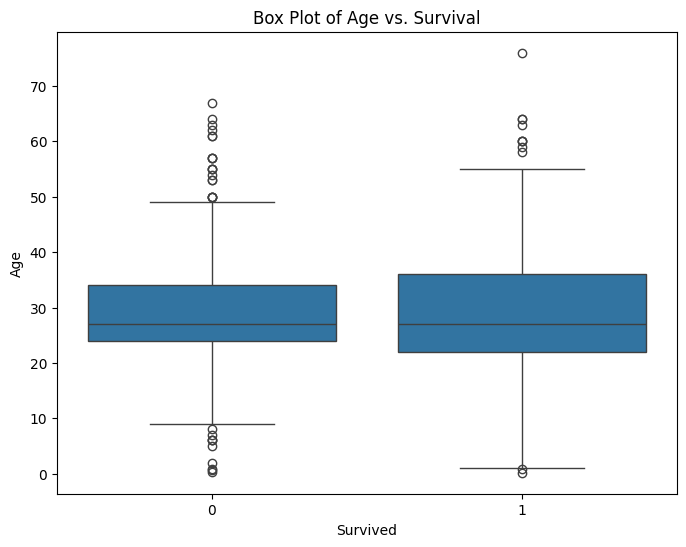

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

# Box plot for Fare
plt.figure(figsize=(8, 6))
sns.boxplot(x='Survived', y='Fare', data=titanic_data)
plt.title('Box Plot of Fare vs. Survival')
plt.show()

# Box plot for Age
plt.figure(figsize=(8, 6))
sns.boxplot(x='Survived', y='Age', data=titanic_data)
plt.title('Box Plot of Age vs. Survival')
plt.show()


In [20]:
print(f"Percentage of male who alived:{s11:.2f}%")
print(f"Percentage of male who are dead:{s22:.2f}%")

Percentage of male who alived:37.74%
Percentage of male who are dead:62.26%


In [21]:
d1=0
d2=0

for i in range(t):
    if titanic_data['Survived'].iloc[i]==1:
        d1+=1
    else:
        d2+=1

In [22]:
print("Total no of female who alived:",d1)
print("Total no of female who are dead:",d2)

Total no of female who alived: 56
Total no of female who are dead: 96


In [23]:
d11=(d1*100)/(d1+d2)
d22=(d2*100)/(d1+d2)

In [24]:
print(f"Percentage of female who alived:{d11:.2f}%")
print(f"Percentage of female who are dead:{d22:.2f}%")

Percentage of female who alived:36.84%
Percentage of female who are dead:63.16%


In [25]:
f1=(s1*100)/len(titanic_data)
f2=(s2*100)/len(titanic_data)


## Improved Model Evaluation
Using cross-validation to ensure more robust model evaluation.


In [26]:

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

# Define features and target variable
X = titanic_data.drop(columns=['Survived', 'Name', 'Sex', 'Embarked'])  # Drop non-numeric and target columns
y = titanic_data['Survived']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Perform cross-validation
model = LogisticRegression()
scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
print(f"Cross-Validation Accuracy Scores: {scores}")
print(f"Mean Accuracy: {scores.mean()}")


Cross-Validation Accuracy Scores: [0.6119403  0.62686567 0.6119403  0.60606061 0.66666667]
Mean Accuracy: 0.6246947082767977


In [27]:
print(f"Percentage of male who alived overall dataset:{f1:.2f}%")
print(f"Percentage of male who are dead overall dataset:{f2:.2f}%")

Percentage of male who alived overall dataset:23.98%
Percentage of male who are dead overall dataset:39.57%


In [28]:
p1=(d1*100)/len(titanic_data)
p2=(d2*100)/len(titanic_data)

In [29]:
print(f"Percentage of female who alived overall dataset:{p1:.2f}%")
print(f"Percentage of female who are dead overall dataset:{p2:.2f}%")

Percentage of female who alived overall dataset:13.43%
Percentage of female who are dead overall dataset:23.02%


In [30]:
# Step 6: Calculate Fare Statistics
average_fare = titanic_data['Fare'].mean()
(f"Average Fare: {average_fare}")

'Average Fare: 35.627188489208635'

In [31]:
min_fare = titanic_data['Fare'].min()
(f"Minimum Fare: {min_fare}")

'Minimum Fare: 0.0'

In [32]:
max_fare = titanic_data['Fare'].max()
(f"Maximum Fare: {max_fare}")

'Maximum Fare: 512.3292'

In [33]:
# Step 7: Find Correlation
numeric_data = titanic_data.select_dtypes(include=[np.number])

In [34]:
# Find the correlation matrix
correlation_matrix = numeric_data.corr()

In [35]:
# Print the correlation matrix
correlation_matrix

,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,1.000000,-0.107203,0.012547,0.099136,0.158534,0.191514
Pclass,-0.107203,1.000000,-0.476790,0.002136,0.019581,-0.577147
Age,0.012547,-0.476790,1.000000,-0.068791,-0.041699,0.347105
SibSp,0.099136,0.002136,-0.068791,1.000000,0.306566,0.171539
Parch,0.158534,0.019581,-0.041699,0.306566,1.000000,0.230046
Fare,0.191514,-0.577147,0.347105,0.171539,0.230046,1.000000


In [36]:
survival_rate_by_class = titanic_data.groupby('Pclass')['Survived'].mean() * 100
survival_rate_by_class

Pclass
1    46.728972
2    32.258065
3    33.179724
Name: Survived, dtype: float64

In [37]:
# Step 9: Save the Cleaned Data
# Save the cleaned dataset to a new CSV file
titanic_data.to_csv('cleaned_titanic_data.csv', index=False)

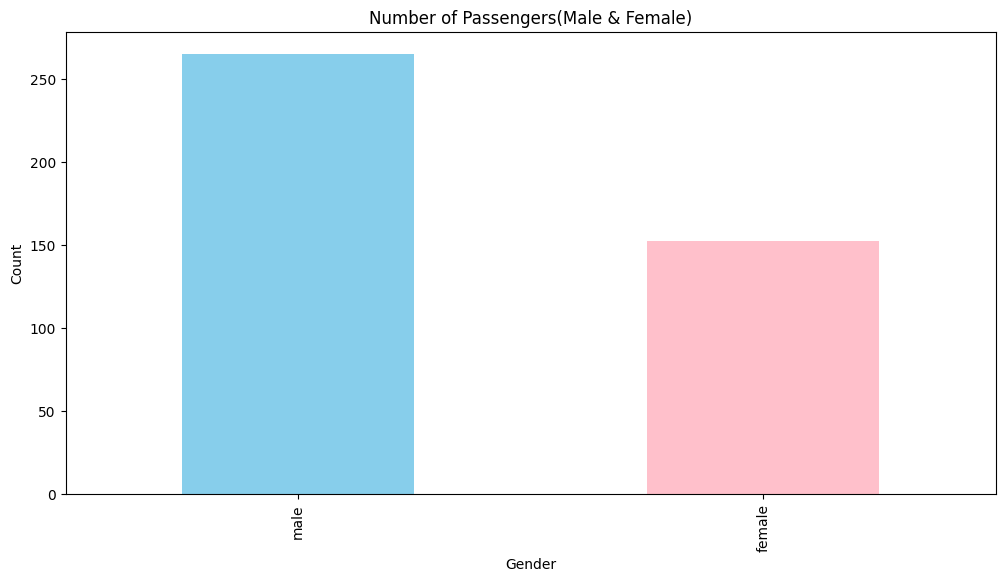

In [38]:
# Analyzing passenger distribution using count
plt.figure(figsize=(12, 6))
titanic_data['Sex'].value_counts().plot(kind='bar', color=['skyblue', 'pink'])
plt.title('Number of Passengers(Male & Female)')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

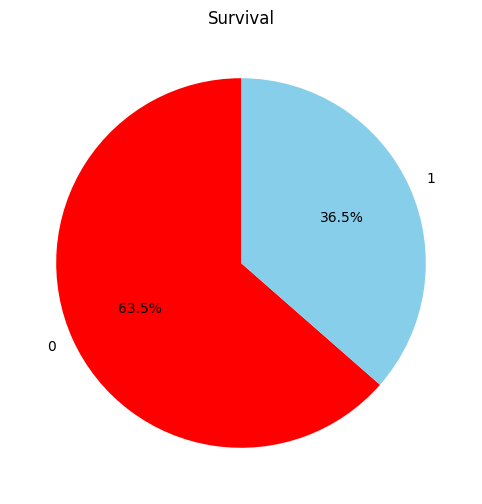

In [39]:
# Analyzing survival counts using pie chart
plt.figure(figsize=(12, 6))
titanic_data['Survived'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['red', 'skyblue'])
plt.title('Survival')
plt.ylabel('')
plt.show()

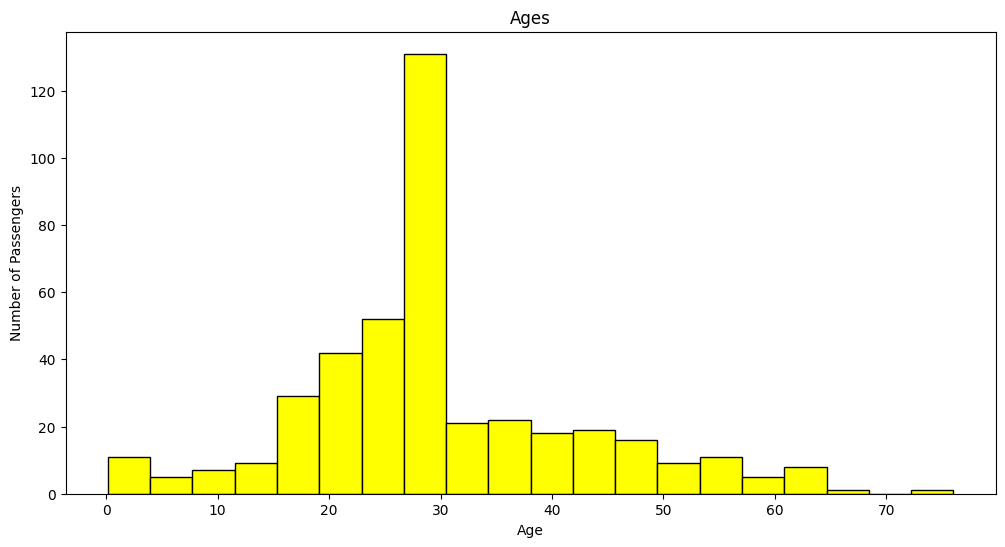

In [40]:
plt.figure(figsize=(12, 6))
plt.hist(titanic_data['Age'].dropna(), bins=20, color='yellow', edgecolor='black')
plt.title('Ages')
plt.xlabel('Age')
plt.ylabel('Number of Passengers')
plt.show()

<Figure size 1200x600 with 0 Axes>

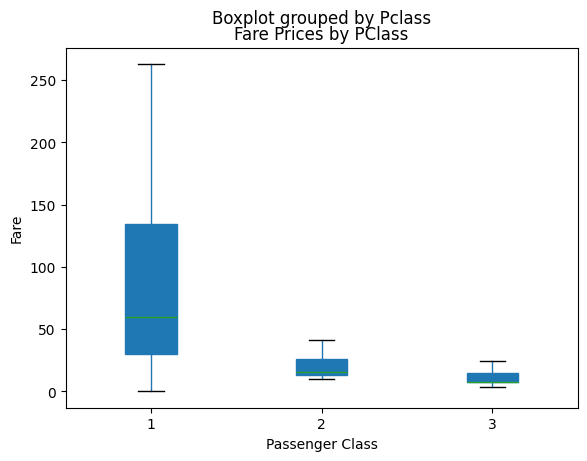

In [41]:
plt.figure(figsize=(12, 6))
titanic_data.boxplot(column='Fare', by='Pclass', grid=False, showfliers=False, patch_artist=True)
plt.title('Fare Prices by PClass')
plt.xlabel('Passenger Class')
plt.ylabel('Fare')
plt.show()

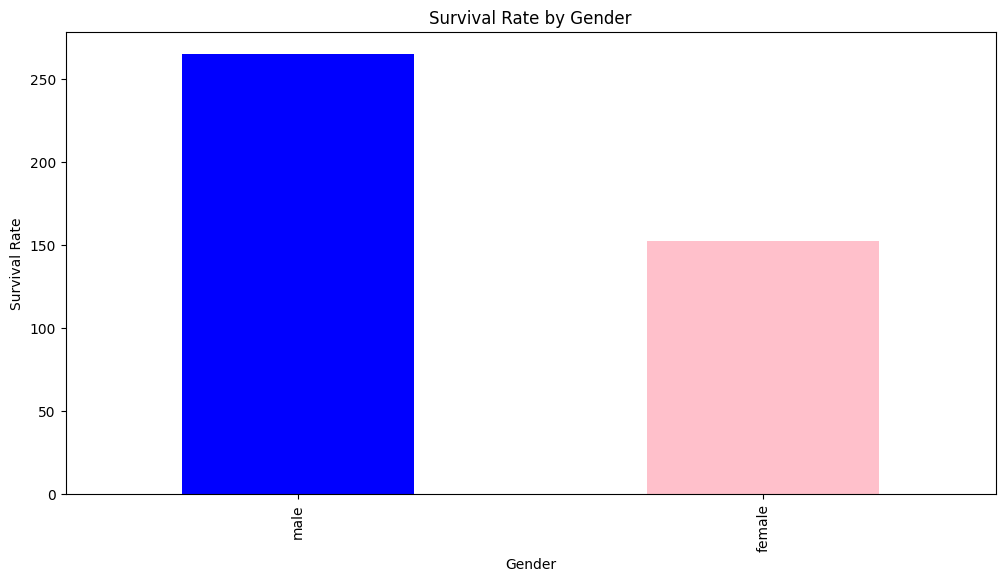

In [42]:
plt.figure(figsize=(12, 6))
titanic_data['Sex'].value_counts().plot(kind='bar', color=['blue', 'pink'])
plt.title('Survival Rate by Gender')
plt.xlabel('Gender')
plt.ylabel('Survival Rate')
plt.show()

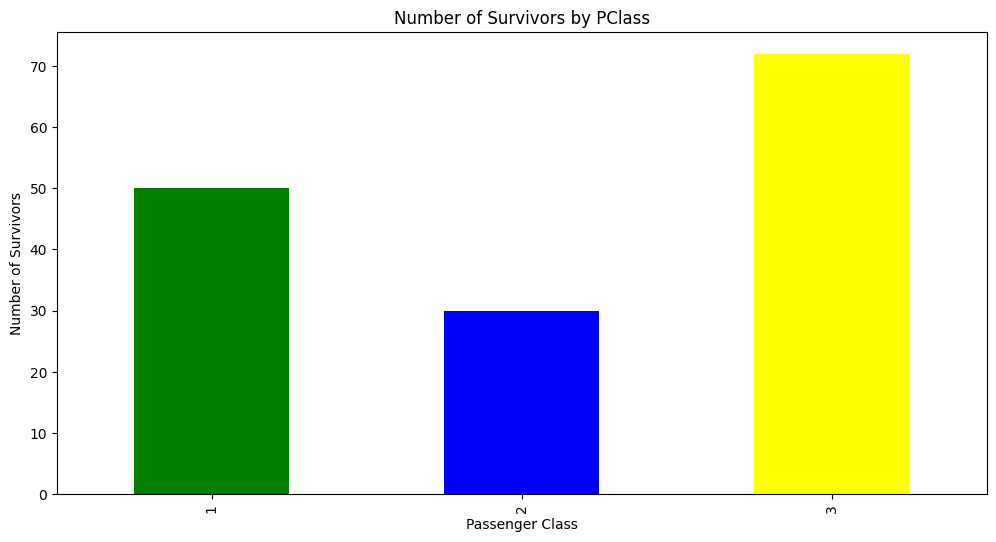

In [43]:
plt.figure(figsize=(12, 6))
titanic_data.groupby('Pclass')['Survived'].sum().plot(kind='bar', color=['green', 'blue', 'yellow'])
plt.title('Number of Survivors by PClass')
plt.xlabel('Passenger Class')
plt.ylabel('Number of Survivors')
plt.show()

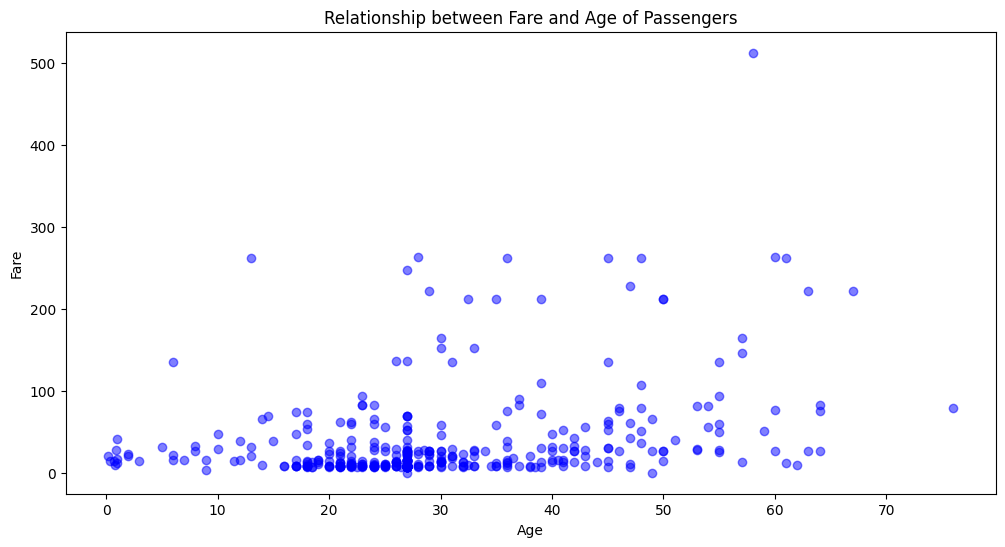

In [44]:
plt.figure(figsize=(12, 6))
plt.scatter(titanic_data['Age'], titanic_data['Fare'], color='blue', alpha=0.5)
plt.title('Relationship between Fare and Age of Passengers')
plt.xlabel('Age')
plt.ylabel('Fare')
plt.show()

In [45]:
titanic_data['total_Family'] = titanic_data['SibSp'] + titanic_data['Parch'] + 1

In [46]:
titanic_data['Fare_Per_Person'] = titanic_data['Fare'] / titanic_data['total_Family']

In [47]:
titanic_data[['Fare', 'SibSp', 'Parch', 'Fare_Per_Person']].head()

,Fare,SibSp,Parch,Fare_Per_Person
0,7.8292,0,0,7.829200
1,7.0000,1,0,3.500000
2,9.6875,0,0,9.687500
3,8.6625,0,0,8.662500
4,12.2875,1,1,4.095833


In [48]:
titanic_data['alone_passenger'] = (titanic_data['SibSp'] == 0) & (titanic_data['Parch'] == 0)

In [49]:
survival_rate = titanic_data.groupby('alone_passenger')['Survived'].mean() * 100
survival_rate

alone_passenger
False    50.909091
True     26.984127
Name: Survived, dtype: float64

In [50]:
titanic_data[['SibSp', 'Parch', 'alone_passenger', 'Survived']].head()

,SibSp,Parch,alone_passenger,Survived
0,0,0,True,0
1,1,0,False,1
2,0,0,True,0
3,0,0,True,0
4,1,1,False,1


In [51]:
#optional
titanic_data['alone_passenger'] = np.where(titanic_data['total_Family'] == 1, 1, 0)

In [52]:
#optional
survival_rate = titanic_data.groupby('alone_passenger')['Survived'].mean() * 100
survival_rate

alone_passenger
0    50.909091
1    26.984127
Name: Survived, dtype: float64

In [53]:
maximum_fare = titanic_data['Fare'].max()
maximum_fare

512.3292

In [54]:
expensive_passengers = titanic_data[titanic_data['Fare'] == max_fare]

In [55]:
print(expensive_passengers[['Name', 'Fare']])

                                                  Name      Fare
343  Cardeza, Mrs. James Warburton Martinez (Charlo...  512.3292


In [56]:
avg_survival_rate = titanic_data.groupby(['Embarked','Sex','Pclass'])['Survived'].value_counts()
avg_survival_rate

Embarked  Sex     Pclass  Survived
C         female  1       1            28
                  2       1             4
                  3       1             8
          male    1       0            28
                  2       0             7
                  3       0            27
Q         female  1       1             1
                  3       1            23
          male    2       0             4
                  3       0            18
S         female  1       1            21
                  2       1            26
                  3       1            41
          male    1       0            29
                  2       0            52
                  3       0           100
Name: count, dtype: int64

In [57]:
mean_age = titanic_data.groupby('Pclass')['Age'].mean()

In [58]:
cond = titanic_data['Age'] > titanic_data['Pclass'].map(mean_age)

In [59]:
passengers_mean_age = titanic_data[cond]

In [60]:
passenger_names = passengers_mean_age['Name']
passenger_names

0                      Kelly, Mr. James
1      Wilkes, Mrs. James (Ellen Needs)
2             Myles, Mr. Thomas Francis
3                      Wirz, Mr. Albert
6                  Connolly, Miss. Kate
                     ...               
412      Henriksson, Miss. Jenny Lovisa
413                  Spector, Mr. Woolf
415        Saether, Mr. Simon Sivertsen
416                 Ware, Mr. Frederick
417            Peter, Master. Michael J
Name: Name, Length: 229, dtype: object

In [61]:
#using lambda func
mean_age = titanic_data.groupby('Pclass')['Age'].mean()

passenger_names = titanic_data[titanic_data.apply(lambda x: x['Age'] > mean_age[x['Pclass']], axis=1)]

print(passenger_names[['Name', 'Pclass', 'Age']])

                                 Name  Pclass   Age
0                    Kelly, Mr. James       3  34.5
1    Wilkes, Mrs. James (Ellen Needs)       3  47.0
2           Myles, Mr. Thomas Francis       2  62.0
3                    Wirz, Mr. Albert       3  27.0
6                Connolly, Miss. Kate       3  30.0
..                                ...     ...   ...
412    Henriksson, Miss. Jenny Lovisa       3  28.0
413                Spector, Mr. Woolf       3  27.0
415      Saether, Mr. Simon Sivertsen       3  38.5
416               Ware, Mr. Frederick       3  27.0
417          Peter, Master. Michael J       3  27.0

[229 rows x 3 columns]


In [62]:
pivot = titanic_data.pivot_table(values='Fare', index='Sex', columns='Pclass', aggfunc='mean')
pivot

Pclass,1,2,3
Sex,,,
female,115.591168,26.438750,13.735129
male,75.586551,20.184654,11.826350
